In [1]:
pip install tenserflow


The following command must be run outside of the IPython shell:

    $ pip install tenserflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
!pip install tensorflow==1.14.0



     |████████████████████████████████| 109.2MB 48.0MB/s eta 0:00:01�████████████████████▎  | 99.8MB 48.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 22.3MB/s eta 0:00:01
     |████████████████████████████████| 491kB 41.5MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 23.0MB/s eta 0:00:01
ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [3]:
!pip install h5py graphviz pydot

In [4]:
!pip install keras


In [1]:
import tensorflow as tf

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
batch_size = 128
num_classes = 10
epochs = 20

In [59]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()


In [60]:
xtrain = xtrain.reshape(60000,784)
xtest = xtest.reshape(10000,784)
xtrain = xtrain.astype('float32')
xtest= xtest.astype('float32')
xtrain/=255
xtest /= 255
ytest = to_categorical (ytest,num_classes)
ytrain = to_categorical (ytrain,num_classes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


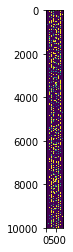

In [52]:
#print(xtest[i])
print(xtest)
plt.imshow(xtest)

In [67]:
model = Sequential()

model.add(Dense(512, activation= 'relu', input_shape=(784,)))

model.add(Dropout(0.2))

model.add(Dense(512, activation= 'relu'))

model.add(Dropout(0.2))
model.add(Dense(num_classes, activation= 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

W0519 15:14:07.603159 140612638295872 deprecation_wrapper.py:119] From /opt/conda/envs/Python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0519 15:14:07.631694 140612638295872 deprecation_wrapper.py:119] From /opt/conda/envs/Python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(xtrain,ytrain,batch_size=batch_size, epochs=epochs, validation_data=(xtest, ytest))
score=model.evaluate(xtest,ytest, verbose=0)

W0519 15:17:46.199739 140612638295872 deprecation.py:323] From /opt/conda/envs/Python36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 433us/step - loss: 1.2594 - acc: 0.6747 - val_loss: 0.5541 - val_acc: 0.8650
Epoch 2/20
60000/60000 [==============================] - 27s 446us/step - loss: 0.5352 - acc: 0.8502 - val_loss: 0.3814 - val_acc: 0.8979
Epoch 3/20
60000/60000 [==============================] - 27s 442us/step - loss: 0.4269 - acc: 0.8766 - val_loss: 0.3243 - val_acc: 0.9120
Epoch 4/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.3748 - acc: 0.8923 - val_loss: 0.2948 - val_acc: 0.9164
Epoch 5/20
60000/60000 [==============================] - 29s 477us/step - loss: 0.3415 - acc: 0.8999 - val_loss: 0.2733 - val_acc: 0.9222
Epoch 6/20
60000/60000 [==============================] - 29s 483us/step - loss: 0.3182 - acc: 0.9069 - val_loss: 0.2556 - val_acc: 0.9279
Epoch 7/20
60000/60000 [==============================] - 30s 494us/step - loss: 0.2985 - acc: 0.9135 - val_loss: 0.

In [ ]:
print('loss : ', score[0])
print('accuracy', score[1])